In [1]:
###---IMPORT LIBRARY---###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
###---DATA PREPROCESSING---###

In [4]:
def readFileCSV(filePath):
    df = pd.read_csv(filePath)
    return df

df = readFileCSV("world_population.csv")
print(df.head()) 

   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796

In [5]:
df.shape

(234, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [7]:
df.nunique()

Rank                           234
CCA3                           234
Country/Territory              234
Capital                        234
Continent                        6
2022 Population                234
2020 Population                234
2015 Population                234
2010 Population                234
2000 Population                234
1990 Population                234
1980 Population                234
1970 Population                234
Area (km²)                     233
Density (per km²)              234
Growth Rate                    180
World Population Percentage     70
dtype: int64

In [8]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [9]:
###---DATA EXPLORATION---###

In [10]:
selectedColumns = ['Continent', 
                   '2022 Population',
                   '2020 Population', 
                   '2015 Population', 
                   '2010 Population', 
                   '2000 Population', 
                   '1990 Population', 
                   '1980 Population', 
                   '1970 Population']
selectedData = df[selectedColumns]
populationByContinent = selectedData.groupby('Continent').sum()
print(populationByContinent)

               2022 Population  2020 Population  2015 Population  \
Continent                                                          
Africa              1426730932       1360671810       1201102442   
Asia                4721383274       4663086535       4458250182   
Europe               743147538        745792196        741535608   
North America        600296136        594236593        570383850   
Oceania               45038554         43933426         40403283   
South America        436816608        431530043        413134396   

               2010 Population  2000 Population  1990 Population  \
Continent                                                          
Africa              1055228072        818946032        638150629   
Asia                4220041327       3735089604       3210563577   
Europe               735613934        726093423        720320797   
North America        542720651        486069584        421266425   
Oceania               37102764         31222778

    Country/Territory  2022 Population
41              China       1425887337
92              India       1417173173
221     United States        338289857
93          Indonesia        275501339
156          Pakistan        235824862


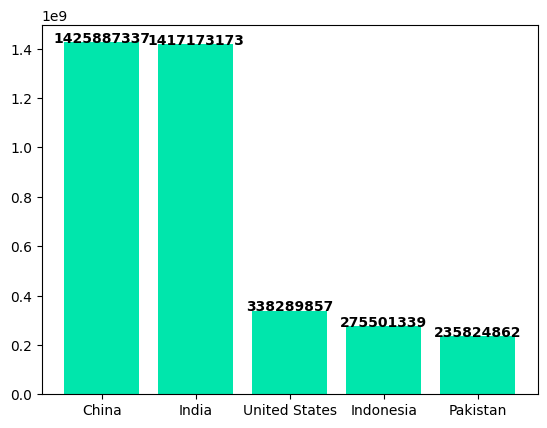

In [11]:
top5Population2022 = df.nlargest(5, '2022 Population')
selectedColumns = top5Population2022[['Country/Territory', '2022 Population']]
print(selectedColumns)

countries = selectedColumns['Country/Territory']
population = selectedColumns['2022 Population']

plt.bar(countries, population, color='#00e6ac')

for i, v in enumerate(population):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

    Country/Territory  2022 Population
226      Vatican City              510
209           Tokelau             1871
150              Niue             1934
64   Falkland Islands             3780
137        Montserrat             4390


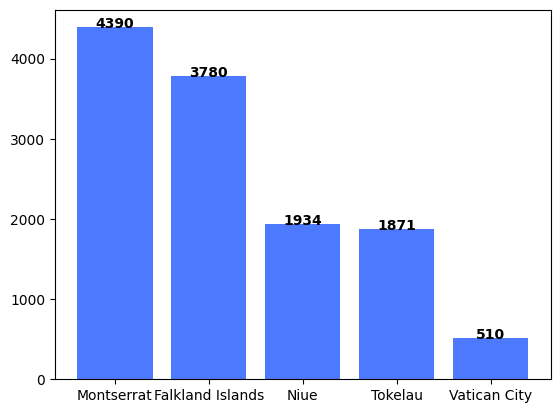

In [12]:
bottom5Population2022 = df.nsmallest(5, '2022 Population')
selectedColumns = bottom5Population2022[['Country/Territory', '2022 Population']]
print(selectedColumns)

selectedColumns = selectedColumns.sort_values(by=['2022 Population'], ascending=False)

countries = selectedColumns['Country/Territory']
population = selectedColumns['2022 Population']

plt.bar(countries, population, color='#4d79ff')

for i, v in enumerate(population):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')